# <span style="color:yellow;">Warmart Store Sales Foresting </span> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import plotly.express as px
import os 
import opendatasets as od

In [2]:
style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'serif'

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (8, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
os.chdir(r'C:\Users\where\OneDrive\바탕 화면\Jan-to-Dec\walmart-recruiting-store-sales-forecasting')

stores = pd.read_csv('stores.csv')
walmart = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
features = pd.read_csv('features.csv')


# 데이터 합치기

In [4]:
m = walmart.merge(stores, how='left').merge(features, how='left')
testing_m = test.merge(stores, how='left').merge(features, how='left')

In [5]:
m.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [6]:
testing_m.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573


# Data Information 

In [7]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = (df.Date.dt.isocalendar().week)*1.0   
    
split_date(m) 
split_date(testing_m)   

## Data Column Information - Data Type

In [8]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

# Missing Values

In [9]:
missing_values = m.isna().sum()
missing_values = missing_values[missing_values > 0]

In [10]:
missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Variable', 'Missing Values']

In [11]:
fig = px.bar(missing_values_df,
             x='Variable',
             y='Missing Values',
             title="Missing Values in Walmart Dataset",
             labels={'Variable': '변수', 'Missing Values': '결측값 개수'},
             template='plotly_dark')

fig.show()

그래프를 확인해보면, Markdown 1~5에는 각 열에 250000개가 넘는 많은 누락 값이 포함되어 있다는 사실을 알 수 있습니다. 이러한 열은 여러 스토어에서 진행 중인 프로모션 활동에 해당합니다

 # <span style="color:yellow;">  탐색적 데이터 분석 </span>  

## 매장 유형별 인기도

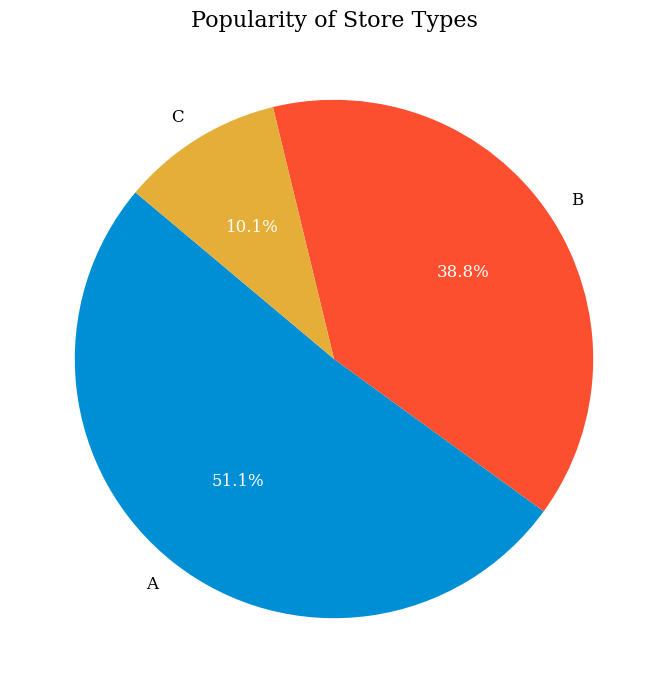

In [12]:
typecounts = m.Type.value_counts().to_dict()
df = pd.DataFrame(list(typecounts.items()), columns=['Store_Type', 'Counts'])

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(df['Counts'], labels=df['Store_Type'], autopct='%1.1f%%', startangle=140)

plt.title('Popularity of Store Types', fontsize=16)
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('white')

plt.show()

# 매장 유형별 - Average Sales 

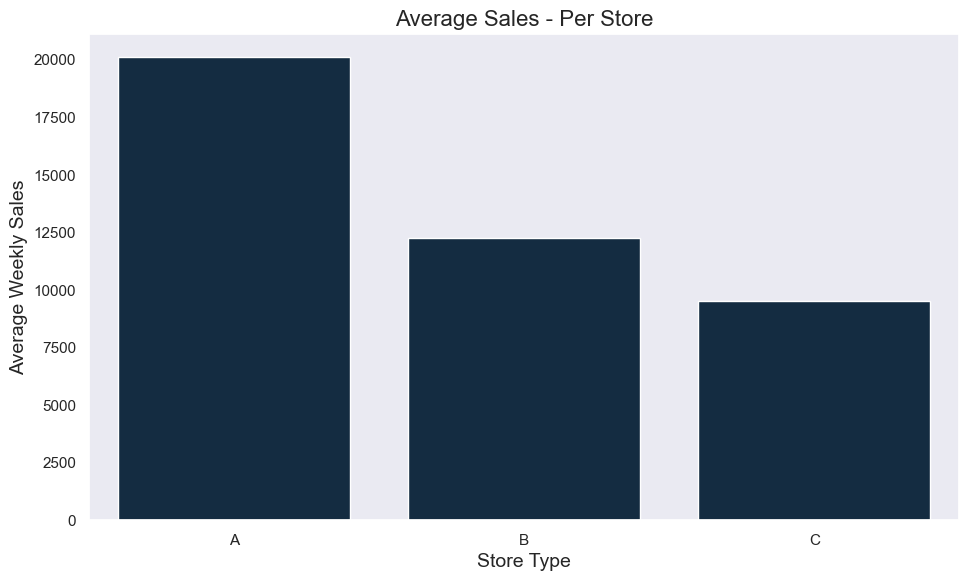

In [13]:
avgweeklysales = m.groupby('Type')['Weekly_Sales'].mean().reset_index()
avgweeklysales.columns = ['Store_Type', 'AvgSales']

sns.set_theme(style="dark", palette="pastel")

plt.figure(figsize=(10, 6))
sns.barplot(data=avgweeklysales, x='Store_Type', y='AvgSales', color="#0c2d48") 
plt.title("Average Sales - Per Store", fontsize=16)
plt.xlabel("Store Type", fontsize=14)
plt.ylabel("Average Weekly Sales", fontsize=14)

plt.show()

# 연도별 평균 월간 매출

In [14]:
sales2010 = m[m.Year == 2010].groupby('Month')['Weekly_Sales'].mean().reset_index()
sales2010.columns = ['Month', 'AvgSales2010']

sales2011 = m[m.Year == 2011].groupby('Month')['Weekly_Sales'].mean().reset_index()
sales2011.columns = ['Month', 'AvgSales2011']

sales2012 = m[m.Year == 2012].groupby('Month')['Weekly_Sales'].mean().reset_index()
sales2012.columns = ['Month', 'AvgSales2012']


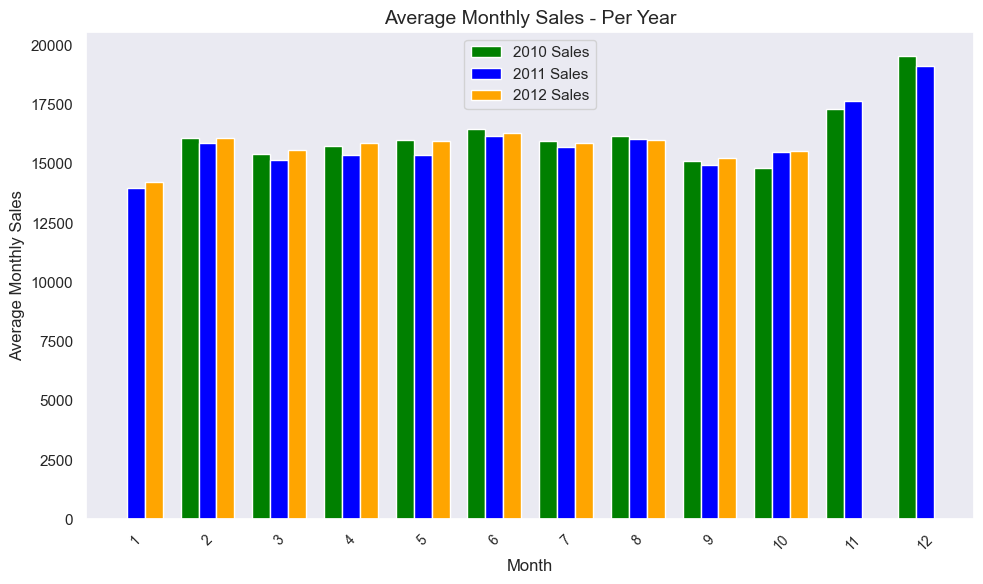

In [15]:
monthly_sales = pd.merge(sales2010, sales2011, on="Month", how="outer")
monthly_sales = pd.merge(monthly_sales, sales2012, on="Month", how="outer")


monthly_sales.columns = ['Month', 'AvgSales2010', 'AvgSales2011', 'AvgSales2012']

bar_width = 0.25
index = np.arange(len(monthly_sales))  # 월별 X축 위치

plt.figure(figsize=(10,6))
plt.bar(index - bar_width, monthly_sales['AvgSales2010'], bar_width, label='2010 Sales', color='green')
plt.bar(index, monthly_sales['AvgSales2011'], bar_width, label='2011 Sales', color='blue')
plt.bar(index + bar_width, monthly_sales['AvgSales2012'], bar_width, label='2012 Sales', color='orange')

plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Monthly Sales', fontsize=12)
plt.title('Average Monthly Sales - Per Year', fontsize=14)

plt.xticks(index, monthly_sales['Month'], fontsize=10)
plt.xticks(rotation=45)

plt.legend()
# plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

2011년과 2012년 1월에는 가장 낮은 매출이 발생했으며, 2010년의 주간 매출은 데이터에 제공되지 않았습니다.

2월부터 10월까지는 15000선에서 일정하게 유지됨을 알 수 있습니다. 11월과 12월은 2010년과 2011년에 최고 매출이 발생했습니다. 

# 연도별 평균 주간 매출

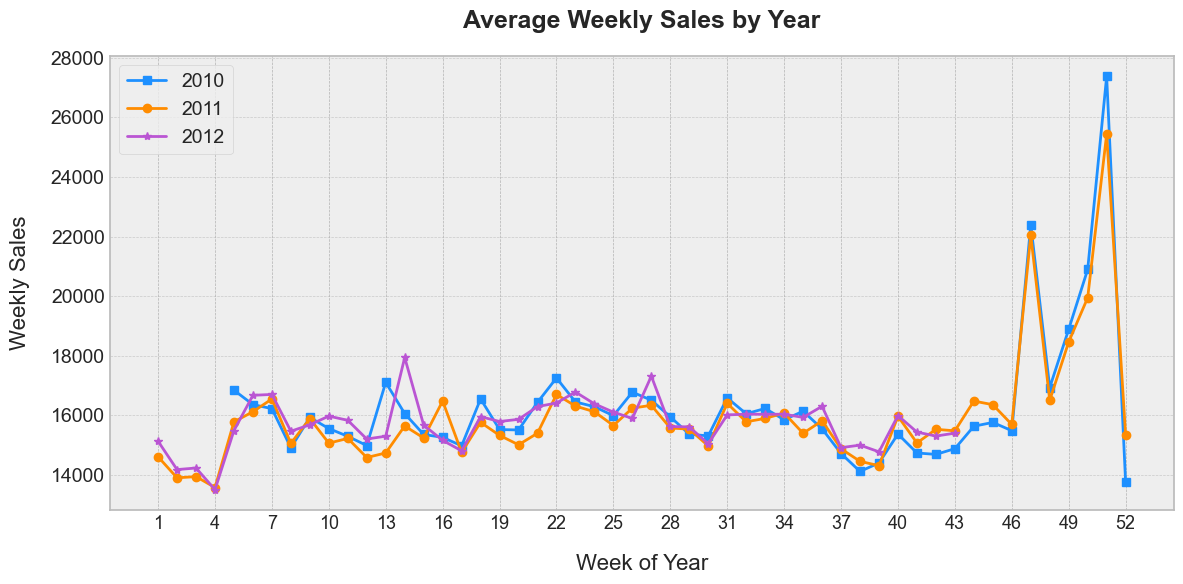

In [16]:
#주간 매출 평균을 계산한다
weekly_sales_2010 = m[m.Year == 2010].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2011 = m[m.Year == 2011].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2012 = m[m.Year == 2012].groupby('WeekOfYear')['Weekly_Sales'].mean()

plt.figure(figsize=(12, 6))
plt.style.use('bmh')

plt.plot(weekly_sales_2010.index, weekly_sales_2010.values, label='2010', marker='s', color='dodgerblue')
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values, label='2011', marker='o', color='darkorange')
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values, label='2012', marker='*', color='mediumorchid')

plt.xlabel('Week of Year', fontsize=16, labelpad=15)
plt.ylabel('Weekly Sales', fontsize=16, labelpad=15)
plt.title('Average Weekly Sales by Year', fontsize=18, fontweight='bold', pad=20)

plt.legend(fontsize=14, loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.xticks(np.arange(1, 53, step=3), fontsize=13)
plt.yticks(fontsize=14)

plt.tight_layout() 
plt.show()

주간 기준으로 추수감사절 연휴가 있는 주와 크리스마스 전 일주일이 2010년과 2011년에 가장 높은 매출을 기록했습니다.

***

# Average Department Sales

In [17]:
import plotly.graph_objects as go

dept_sales = m.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False)

fig = go.Figure(go.Bar(
    x=dept_sales.values,  
    y=dept_sales.index,  
    orientation='h',     
    marker=dict(color='#90EE90') 
))

fig.update_layout(
    title="Average Sales - Per Department",  
    xaxis_title="Sales",  
    yaxis_title="Dept", 
    template="plotly_dark",
    height=1200, 
    width=1000 
)

fig.update_yaxes(tick0=1, dtick=1)
fig.show()


평균 매출은 Department마다 다르다는 것을 알 수 있습니다. 평균 매출이 가장 높은 Dept는 38,65,72,92,95번입니다.

# 공휴일 / 공휴일이 아닌 날 비교하기

In [18]:
holiday_sales = m.groupby('IsHoliday')['Weekly_Sales'].mean()
holiday_counts = m.IsHoliday.value_counts()

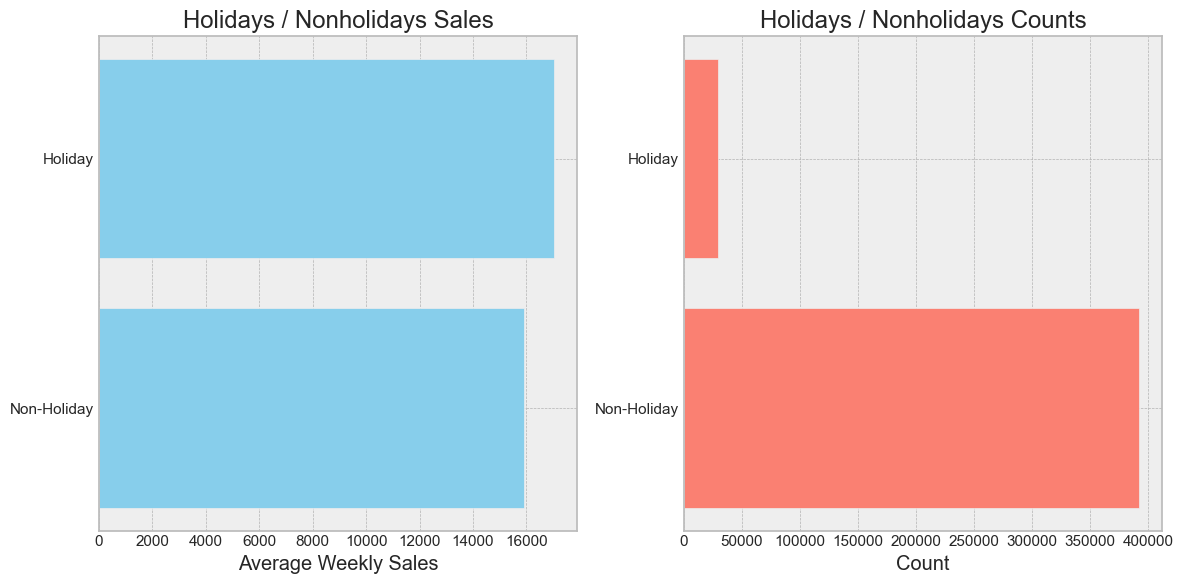

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].barh(holiday_sales.index.map({True: 'Holiday', False: 'Non-Holiday'}), holiday_sales.values, color='skyblue')
axes[0].set_title('Holidays / Nonholidays Sales')
axes[0].set_xlabel('Average Weekly Sales')

axes[1].barh(holiday_counts.index.map({True: 'Holiday', False: 'Non-Holiday'}), holiday_counts.values, color='salmon')
axes[1].set_title('Holidays / Nonholidays Counts')
axes[1].set_xlabel('Count')

plt.tight_layout()
plt.show()

7%는 공휴일에 해당됩니다. 공휴일이 차지하는 비율은 낮습니다. 하지만, 공후일 주간 매출을 공휴일이 아닌 날이 포함된 주간보다 평균적으로 더 높습니다. 

***

## 스토어 크기와 주별 판매량

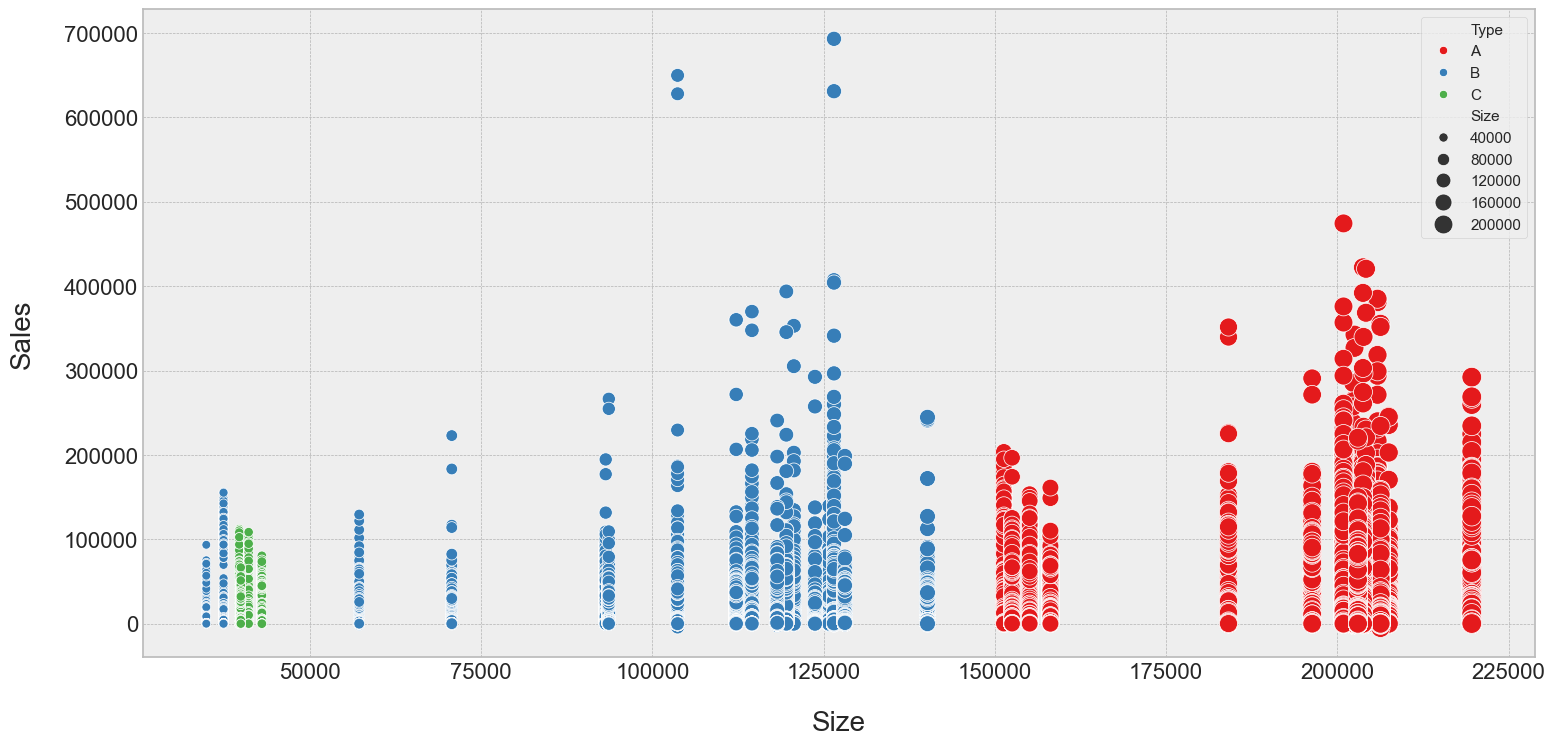

In [20]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=m.Size, y=m.Weekly_Sales, hue=m.Type, size=m.Size, sizes=(40, 200), palette="Set1", data=m)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Size', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.show()

In [21]:
# fig = px.scatter(m, x='Size', y='Weekly_Sales', color='Type', 
#                  size='Size', 
#                  labels={'Size': 'Size', 'Weekly_Sales': 'Sales'},
#                  title='Relationship: Size of Store vs Sales')

# fig.update_layout(
#     xaxis_title='Size',
#     yaxis_title='Sales',
#     xaxis=dict(tickfont=dict(size=16)),
#     yaxis=dict(tickfont=dict(size=16)),
#     title_font=dict(size=20)
# )

# fig.show()

***

# 온도와 판매량의 관계

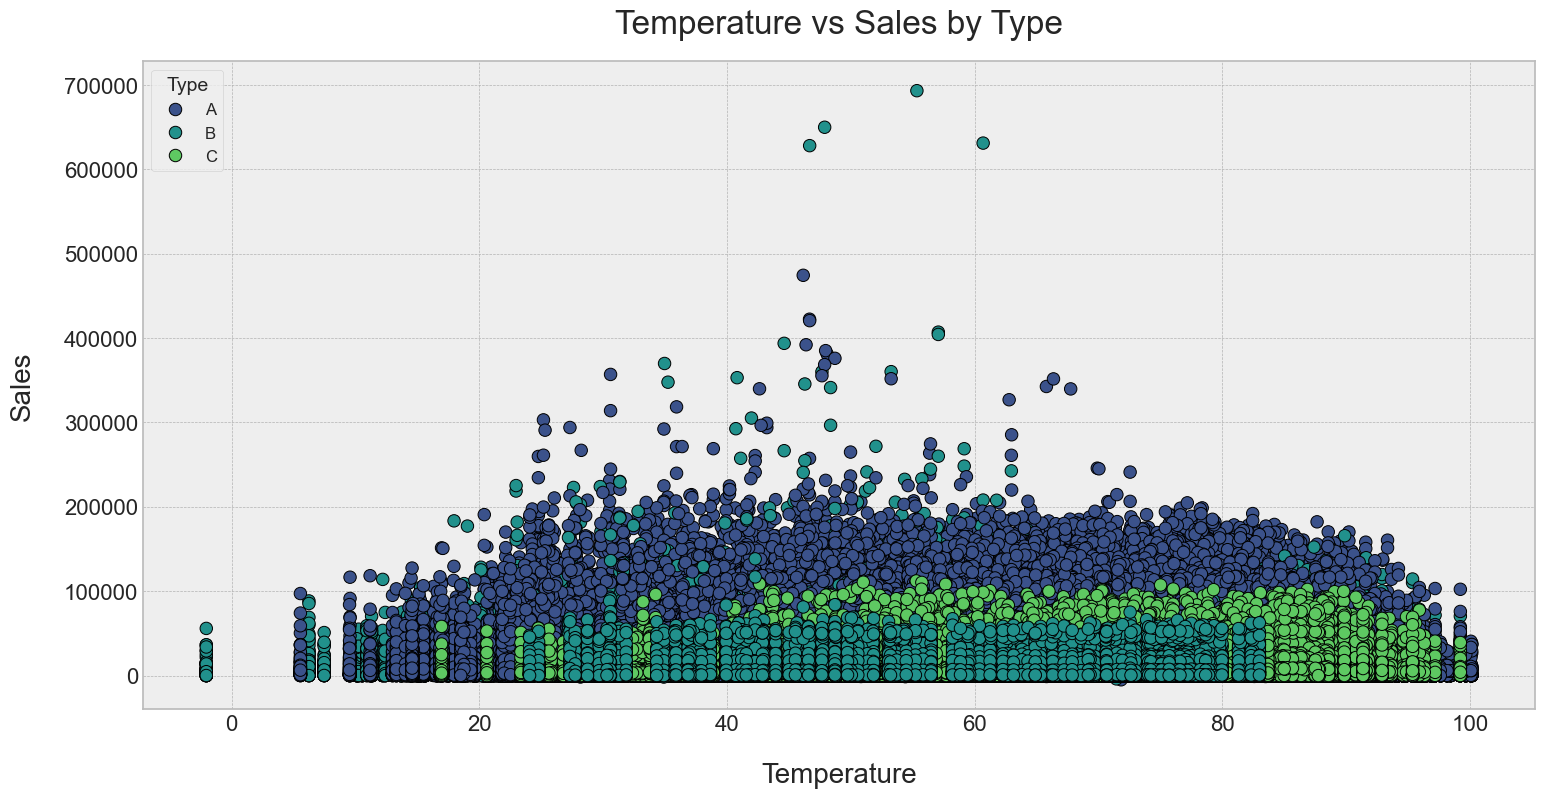

In [22]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=m.Temperature, y=m.Weekly_Sales, hue=m.Type, s=80, palette='viridis', edgecolor='black')

plt.title('Temperature vs Sales by Type', fontsize=24, pad=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Temperature', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(title='Type', title_fontsize='14', loc='upper left', fontsize=12)
plt.show()

기온과 매장의 주간 매출 사이의 상관관계가 없습니다. 
기온이 높을때나 낮을 때 매출이 감소한 듯 보입니다. 하지만. 명확한 관계는 존재하지 않습니다. 

***
<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:yellow"> # correlation matrix </h1><a id=0></a>


다양한 열 간의 관계를 수치적으로 분석하여, 주간 판매와의 상관관계를 확인하고, 이전의 탐색적 데이터 분석(EDA)에서 얻은 통찰이 정확한지 검토하겠습니다. 상관계수는 수치형 열에 대해서만 계산할 수 있기 때문에, 먼저 'Type' 열을 수치 값으로 변환해야 합니다.

In [23]:
storetype_values = {'A':3, 'B':2, 'C':1}
m['Type_Numeric'] = m.Type.map(storetype_values)
testing_m['Type_Numeric'] = testing_m.Type.map(storetype_values)


In [24]:
numeric_columns = m.select_dtypes(include=['number']).columns
m_cleaned = m[numeric_columns].fillna(0)
corr_matrix = m_cleaned.corr()

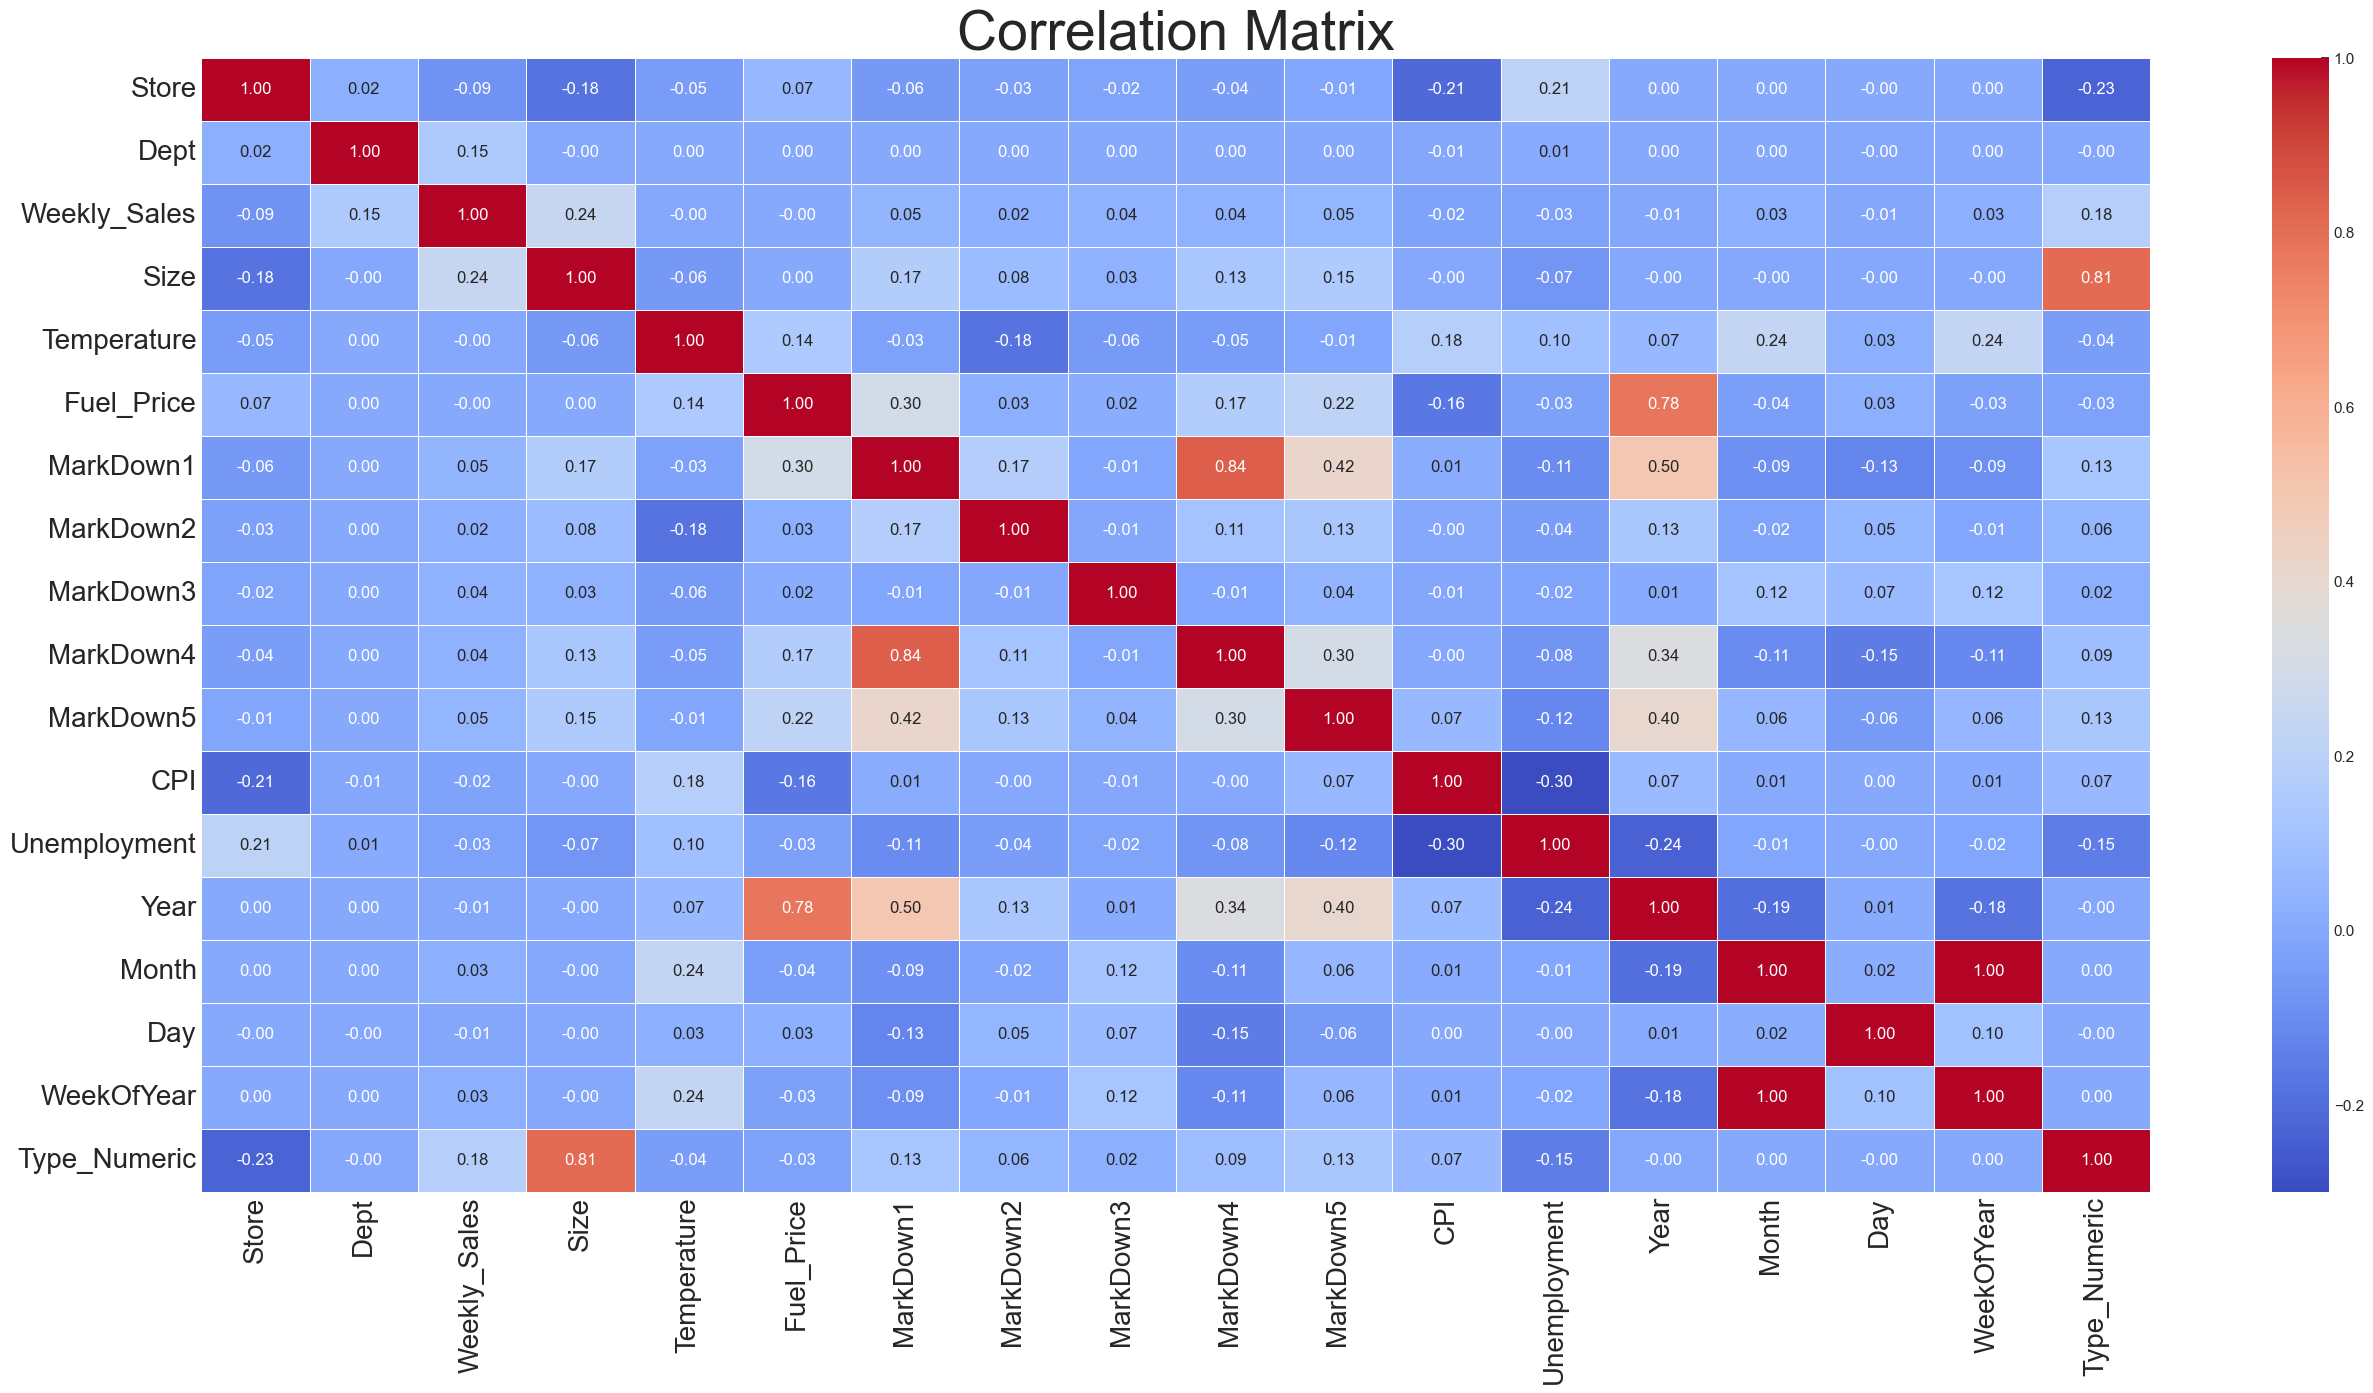

In [25]:
plt.figure(figsize=(28, 14))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, annot_kws={'size':12}, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=40)
plt.show()


Department, 스토어 규모, 유형은 주간 판매와 상관관계가 있습니다. Markdown1 ~ Markdown5까지는 상관관계가 적습니다. 그래서 제외합니다. 

Temperature 부분도 주간 판매량과 상관관계가 적습니다. 

휴일은 추가 분석에 이용할 가치가 있습니다. 

***
# 모델링

In [26]:
merged = m.drop(['Date', 'Temperature', 'Type', 'MarkDown1', 'MarkDown2', 'MarkDown3',
             'MarkDown4', 'MarkDown5', 'Month', 'Day' ], axis=1)

testing_m = testing_m.drop(['Date', 'Temperature', 'Type', 'MarkDown1', 'MarkDown2', 'MarkDown3',
             'MarkDown4', 'MarkDown5', 'Month', 'Day' ], axis=1)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [28]:
print(merged.columns)

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Size', 'Fuel_Price',
       'CPI', 'Unemployment', 'Year', 'WeekOfYear', 'Type_Numeric'],
      dtype='object')


In [29]:
input_cols = merged.columns.to_list()
input_cols.remove('Weekly_Sales')
target_col = 'Weekly_Sales'

inputs_df = merged[input_cols].copy()
targets = merged[target_col].copy()

In [30]:
scaler = MinMaxScaler().fit(merged[input_cols])

inputs_df[input_cols] = scaler.transform(inputs_df[input_cols])
testing_m[input_cols] = scaler.transform(testing_m[input_cols])
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df, targets, test_size=0.3, random_state=42)

In [31]:
def WMAE(df, targets, predictions):
    weights = df.IsHoliday.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(targets-predictions))/(np.sum(weights)), 2)

***

In [32]:
from sklearn.linear_model import LinearRegression


model = LinearRegression().fit(train_inputs, train_targets)
train_preds = model.predict(train_inputs)

# 학습 데이터에 대한 예측값 생성
train_wmae = WMAE(train_inputs, train_targets, train_preds)
print('The WMAE loss for the training set is  {}.'.format(train_wmae))

val_preds = model.predict(val_inputs)

# 검증 데이터에 대한 예측값 생성
val_wmae = WMAE(val_inputs, val_targets, val_preds)
print('The WMAE loss for the validation set is  {}.'.format(val_wmae))


The WMAE loss for the training set is  14766.9.
The WMAE loss for the validation set is  14880.0.


이번 실험에서 모델은 학습 세트에서 WMAE 14,766.9를 기록했으며, 검증 세트에서는 14,880.0의 WMAE를 보였습니다. 두 값이 매우 유사한 결과를 나타내므로, 모델은 데이터에 대해 적절히 일반화된 것으로 평가할 수 있습니다. 다만, 검증 세트에서의 WMAE가 약간 더 높다는 점은 모델이 일부 오버피팅될 가능성을 시사합니다. 이를 개선하기 위해 더 많은 데이터를 수집하거나, 정규화 기법을 적용하는 등의 방법을 고려할 수 있습니다

## Decision tree

In [33]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(train_inputs, train_targets)

tree_train_preds = tree.predict(train_inputs)
tree_train_wmae = WMAE(train_inputs, train_targets, tree_train_preds)
print('The WMAE loss for the training set is {}.'.format(tree_train_wmae))

tree_val_preds = tree.predict(val_inputs)
tree_val_wmae = WMAE(val_inputs, val_targets, tree_val_preds)
print('The WMAE loss for the validation set is {}.'.format(tree_val_wmae))

The WMAE loss for the training set is 0.0.
The WMAE loss for the validation set is 2079.55.


학습 데이터에서의 WMAE 값이 0.0이고, 검증 데이터에서는 2094.05로 큰 차이가 납니다. 
모델이 학습데이터에 과적합되었다는 사실을 확인할 수 있습니다.   

문제 원인을 분석하자면,   
1.Decision Tree 모델은 복잡한 데이터를 학습할 때 매우 잘 맞출 수 있지만, 일반화가 부족합니다.    
2.학습 데이터와 검증 데이터의 분포가 다를 수 있습니다.

C:\Users\where\AppData\Local\Temp\ipykernel_32840\3185592505.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




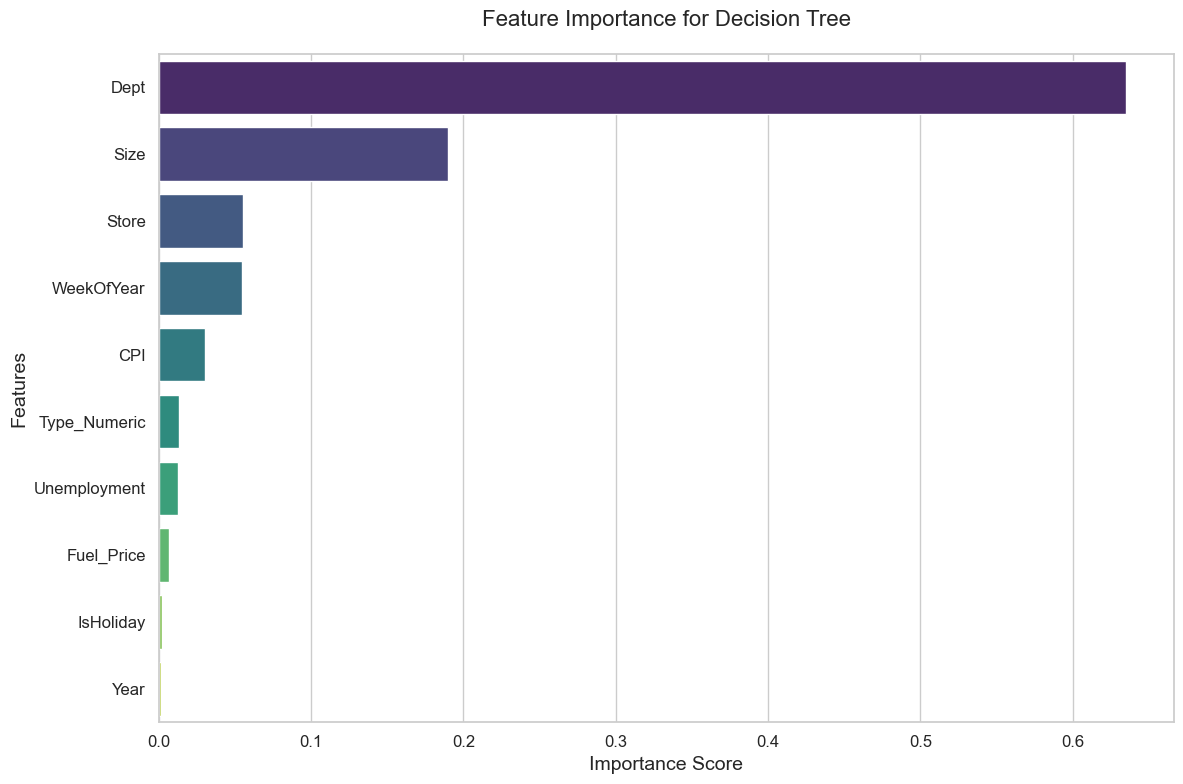

In [34]:
importance_df = pd.DataFrame({
    'Feature': train_inputs.columns,
    'Importance': tree.feature_importances_
}).sort_values('Importance', ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')

plt.title('Feature Importance for Decision Tree', fontsize=16, pad=20)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

Dept는 가장 높은 중요도이다. 모델이 예측을 수행하는 데 가장 큰 영향을 미친다. Year와 IsHoliday 중요도가 거의 없다고 볼 수 있습니다.   
Dept와 Size를 최적화하여 매출 향상을 올릴 수 있습니다. 